
<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Cars4U Price estimation</center></h1>
<h4><center>Author: Enrique Martin Sanchez</center></h4>

# Description
## Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.
##Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

##Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

##Data Dictionary
- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

# Import libraries and set up configuration options

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the csv into data dataframe
data = pd.read_csv('/content/drive/MyDrive/Data Science/Courses/AIML University of Texas/Supervised Learning - Regression/Project 2: Supervised Learning Regression: Cars4U/used_cars_data.csv')
#Lets work on a copy of the original dataframe
df = data.copy()

# Support Functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = "{:,.0f}".format(
                p.get_height()
              )  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def scatter_lineplot(data, feature_x, feature_y, figsize=(12, 7)):
  """
  Boxplot and scatter and lineplot combined

  data: dataframe
  feature_x: dataframe column in x axis
  feature_y: dataframe column in y axis
  figsize: size of figure (default (12,7))
  """
  
  f2, (ax_scatter, ax_line) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.5, 0.5)},
        figsize=figsize,
  ) # creating the 2 subplots
  sns.scatterplot(
      data=data, x=feature_x, y=feature_y, ax=ax_scatter, color="orange"
  ).set_title(feature_x + ' vs ' + feature_y)
  sns.lineplot(
      data=data,  x=feature_x, y=feature_y, ax=ax_line, color="blue", ci=None
  ) 
  

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th percentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def perc_err(act, pred):
    res = np.empty(act.shape)
    for j in range(act.shape[0]):
        if act[j] != 0:
            res[j] = (act[j] - pred[j]) / act[j]
        else:
            res[j] = pred[j] / np.mean(act)
    return res

# function to compute MAPE
def mape_score(y_true, y_pred): 
    return np.mean(np.abs(perc_err(np.asarray(y_true), np.asarray(y_pred)))) * 100

# function to compute MAPE
#def mape_score(targets, predictions):
#    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target, model_name):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": model_name,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    return df_perf

# Exploratory Data Analysis and Data Preprocessing

## Comprehend the data

In [ ]:
#Lets visualize the data
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4567,4567,Volkswagen Passat Diesel Highline 2.0 TDI,Chennai,2010,52000,Diesel,Automatic,First,18.33 kmpl,1968 CC,167.7 bhp,5.00,10.15,9.00
3642,3642,Chevrolet Spark 1.0 LT,Chennai,2008,62000,Petrol,Manual,Third,18.0 kmpl,995 CC,62 bhp,5.00,11.30,1.10
1360,1360,Nissan Sunny 2011-2014 XV,Pune,2013,8000,Petrol,Manual,First,16.95 kmpl,1498 CC,97.7 bhp,5.00,11.33,3.75
3345,3345,Hyundai i20 1.4 CRDi Magna,Kolkata,2011,38277,Diesel,Manual,First,21.9 kmpl,1396 CC,90 bhp,5.00,10.25,2.40
5256,5256,Maruti Vitara Brezza ZDi Plus Dual Tone,Pune,2016,85000,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.00,11.96,8.90


**insights**
- Mileage feature has at least 'kmpl' label
- Engine feature has 'CC' label 
- Power has 'bhp' label

In [ ]:
#Lets see the datatypes of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


**Insights**
- 6 numerical columns: ['S.No.', 'Year','Kilometers_Driven','Seats','New_Price','Price']
- 8 columns of type object: ['Name','Location','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power']
- We have some null values, will get into them later on 

In [ ]:
#Lets see some statistics of our data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,"7,253.00",NaN,NaN,NaN,"3,626.00","2,093.91",0.00,"1,813.00","3,626.00","5,439.00","7,252.00"
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,"7,253.00",NaN,NaN,NaN,"2,013.37",3.25,"1,996.00","2,011.00","2,014.00","2,016.00","2,019.00"
Kilometers_Driven,"7,253.00",NaN,NaN,NaN,"58,699.06","84,427.72",171.00,"34,000.00","53,416.00","73,000.00","6,500,000.00"
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insights**
- S.No. is an incremental identifier of the dataset
- We have more than 2,000 unique names (cars) in the dataset
- We have 11 unique locations
- We have cars from year 1996 to 2019, 50% of them are from 1996 to 2014
- The means of kilometers driven is almost 59,000 and there is clearly an outlier in the right side (most probably an error in the data with a value of 6.5 million)
- We have 5 different values for the Fuel_Type feature
- Owner_Type has 4 unique possible values
- We dont see statsistics of Mileage, Engine and Power due that they have labels in heir values, we will treat them later and see their statistics
- We have cars from 0? to 10 seats with an average of 5.28
- New_price varies from 3.91 to 375 INR Lakhs
- Price varies from 0.44 to 160 INR Lakhs

In [ ]:
#Lets see the null values we have
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

**Insights**
- Price is having the most non values with 1234 records missing it
- Mileage has only 2 missing values
- Engine and seats around 50
- Power 175 missing values

We will **treat** all of them later on

## Univariate analysis

##### S.No.

In [ ]:
# S.No. is of no use to our analysis
df = df.drop('S.No.', axis=1)

##### Name

In [ ]:
# WLets see how name is composed
df.Name.sample(10)

1039                 Jeep Compass 1.4 Limited Option
3493             Hyundai Sonata Transform 2.4 GDi AT
1682                        Hyundai Grand i10 Sportz
4471                         Audi A6 3.0 TDI quattro
6997    Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV
4504                 Renault Duster 110PS Diesel RxL
2140                          Maruti Ertiga SHVS VDI
3159                Volkswagen Polo 1.2 MPI Highline
7047                   Toyota Corolla Executive (HE)
2322                                    Tata Nano XT
Name: Name, dtype: object

In [ ]:
# The first word of the name is the brand and the rest is the model
# Lets create those 2 new features
brand_model = df['Name'].str.split(n=1, expand=True)
brand_model.head()


,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [ ]:
df["Brand"]= brand_model[0]   
df["Model"]= brand_model[1]
df = df.drop('Name', axis=1)

##### Brand

In [ ]:
# Lets see some statistics of the 2 new columns
df.Brand.describe()

count       7253
unique        33
top       Maruti
freq        1444
Name: Brand, dtype: object

In [ ]:
# Lets see how many rows of each brand do we have
df.Brand.value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

We have a lot of brands in the dataset, lets group them in 4 groups:

- Luxury
  - Porsche, Bentley. Lamborghini
- A class
  - Mercedes-Benz, BMW, Audi, Land, Jaguar, Mini, Volvo
- B class
  - Maruti, Honda, Toyota, Volkswagen, Ford, Mahindra, Skoda, Renault, Nissan, Mitsubishi, Jeep
- Convenience
  - Hyundai, Tata, Chevrolet, Fiat, Datsun, ISUZU, Force, Isuzu, Smart, Ambassador, Hindustan, OpelCorsa


In [ ]:
Brand_map = {
    'Porsche': 'Luxury',
    'Bentley': 'Luxury',
    'Lamborghini': 'Luxury',
    'Mercedes-Benz': 'A-class',
    'BMW': 'A-class',
    'Audi': 'A-class',
    'Land': 'A-class',
    'Jaguar': 'A-class',
    'Mini': 'A-class',
    'Volvo': 'A-class',
    'Maruti': 'B-class',
    'Honda': 'B-class',
    'Toyota': 'B-class',
    'Volkswagen': 'B-class',
    'Ford': 'B-class',
    'Mahindra': 'B-class',
    'Skoda': 'B-class',
    'Renault': 'B-class',
    'Nissan': 'B-class',
    'Mitsubishi': 'B-class',
    'Jeep': 'B-class',
    'Hyundai': 'Convenience',
    'Tata': 'Convenience',
    'Chevrolet': 'Convenience',
    'Fiat': 'Convenience',
    'Datsun': 'Convenience',
    'ISUZU': 'Convenience',
    'Force': 'Convenience',
    'Isuzu': 'Convenience',
    'Smart': 'Convenience',
    'Ambassador': 'Convenience',
    'Hindustan': 'Convenience',
    'OpelCorsa': 'Convenience',
}
df.Brand = df.Brand.map(Brand_map) 
df.Brand.value_counts()

B-class        4294
Convenience    1786
A-class        1151
Luxury           22
Name: Brand, dtype: int64

In [ ]:
#lets see how many unique brands there are
df.Brand.nunique()

4

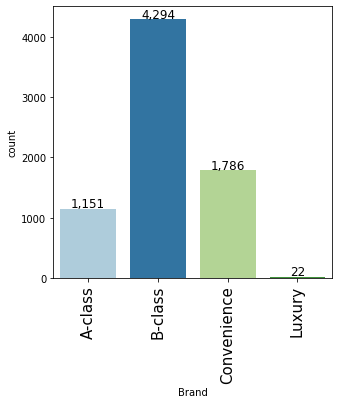

In [ ]:
labeled_barplot(data=df, feature='Brand',)


In [ ]:
#change dtype of Brand to categorical
df.Brand = df.Brand.astype('category')

**Insights** 
- Brand has 4 unique values after grouping
- Brand dtype is category
- B-classis the most frequent brand class
- Luxury is the least frequent one

##### Location

In [ ]:
df.Location.nunique()

11

In [ ]:
df.Location.value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

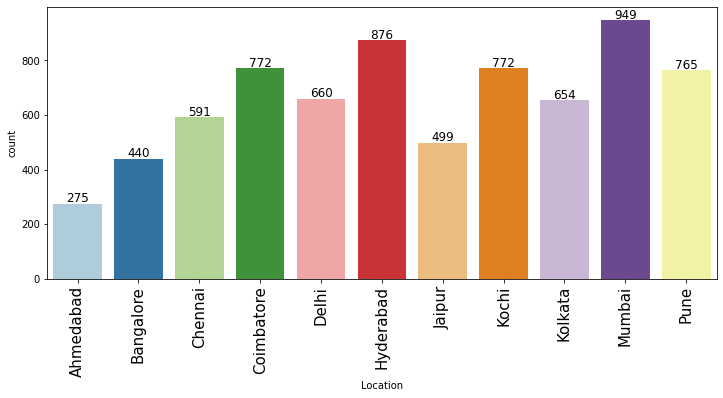

In [ ]:
labeled_barplot(data=df, feature='Location',)


In [ ]:
df.Location = df.Location.astype(dtype='category')

**Insights**
- There are 11 unique locations in the dataset
- Ahmedabad has the least cars
- Mumbai has the most cars
- Changed the type from object to category

##### Year

In [ ]:
df.Year.nunique()

23

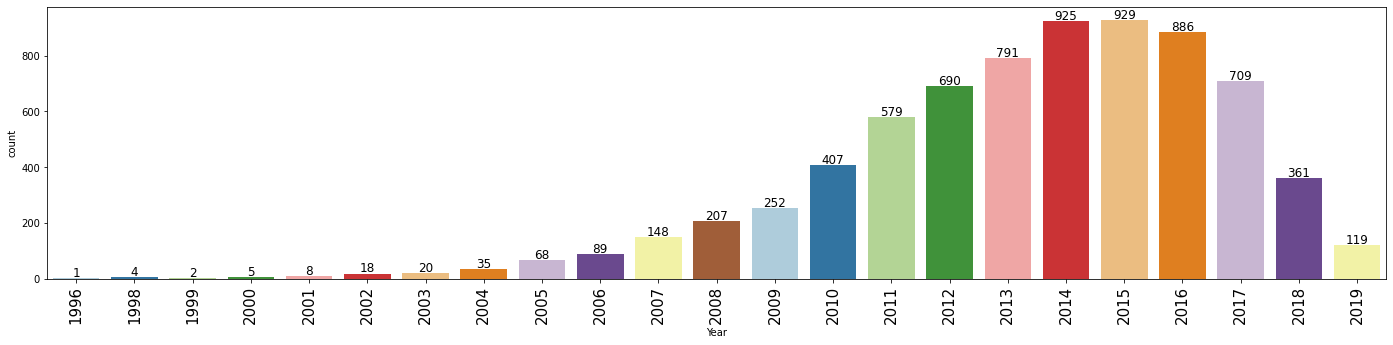

In [ ]:
labeled_barplot(data=df, feature='Year')


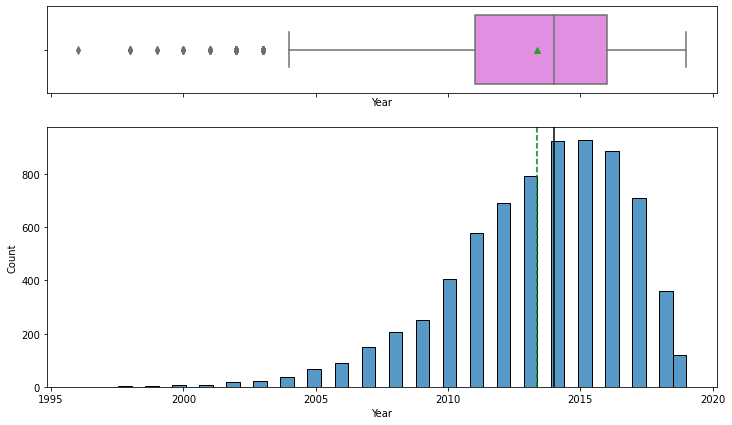

In [ ]:
histogram_boxplot(data=df, feature='Year')

In [ ]:
print('There are',df[df.Year < 2005].Year.count(),'cars of year below 2005 out of a total of',df[df.Year >= 2005].Year.count(), 'cars')

There are 93 cars of year below 2005 out of a total of 7160 cars


In [ ]:
#Lets treat the outliers, so cars before 2005 get transformed to Year=2004 (Q1-1.5IQR)
df = treat_outliers(df=df, col='Year')

In [ ]:
df.Year.value_counts().sort_index()

2,003.50     58
2,004.00     35
2,005.00     68
2,006.00     89
2,007.00    148
2,008.00    207
2,009.00    252
2,010.00    407
2,011.00    579
2,012.00    690
2,013.00    791
2,014.00    925
2,015.00    929
2,016.00    886
2,017.00    709
2,018.00    361
2,019.00    119
Name: Year, dtype: int64

In [ ]:
#IQ1-1.5IQR was 2003.5 which has no sense, we will transform those values to 2014
df['Year'] = df['Year'].apply(np.ceil)

#convert the column dtype to integer
df.Year = df.Year.astype(dtype='category')

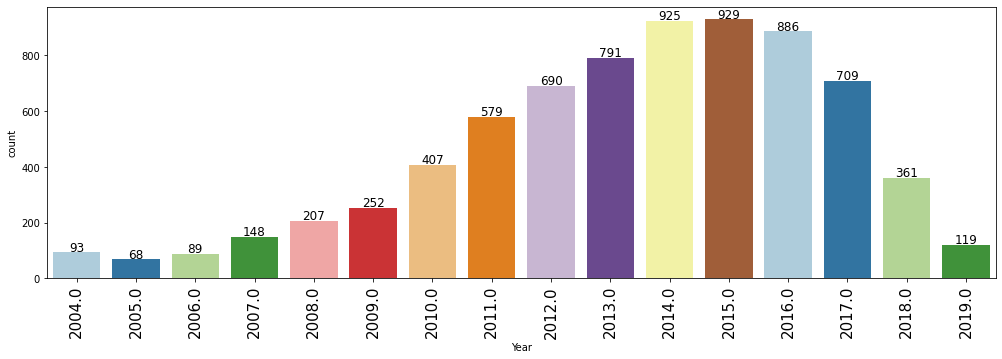

In [ ]:
labeled_barplot(data=df, feature='Year')

**Insights**
- Treated the outliers in the lower side and put them at 2004
- Type category (we will hot encode it later on)
- 2015 and 2014 are the most frequen years

##### Kilometers Driven

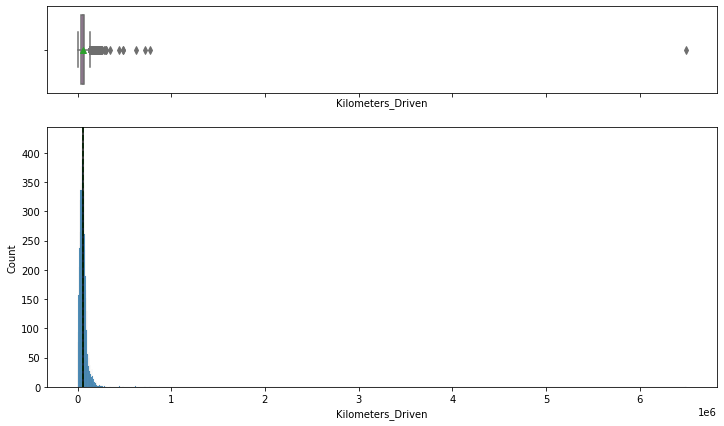

In [ ]:
histogram_boxplot(data=df, feature='Kilometers_Driven')

In [ ]:
df[df.Kilometers_Driven == df.Kilometers_Driven.max()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
2328,Chennai,"2,017.00",6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.00,55.07,65.00,A-class,X5 xDrive 30d M Sport


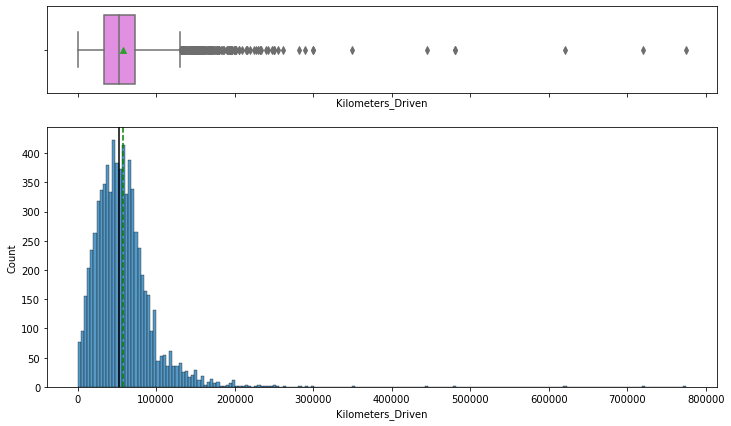

In [ ]:
histogram_boxplot(data=df[df.Kilometers_Driven != 6500000], feature='Kilometers_Driven')

In [ ]:
# We can see besides that erroneous 6.5 millon kilometers we still 
#have some very high numbers, we will treat them as otliers and change 
#those values to Q3+1.5IQR
df = treat_outliers(df=df, col='Kilometers_Driven')

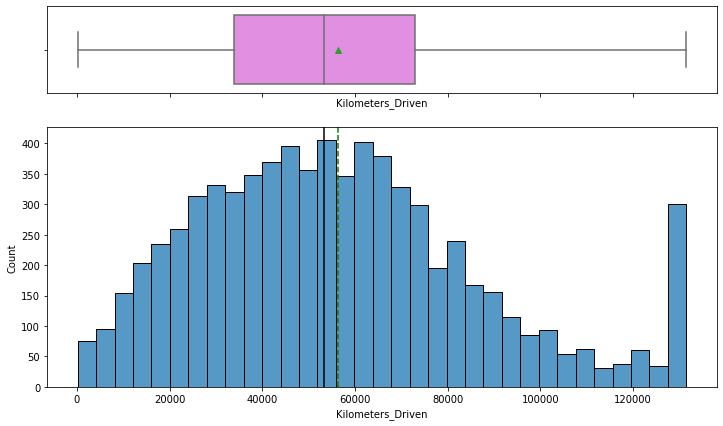

In [ ]:
histogram_boxplot(data=df, feature='Kilometers_Driven')

In [ ]:
df.Kilometers_Driven.describe()

count     7,253.00
mean     56,277.37
std      30,187.24
min         171.00
25%      34,000.00
50%      53,416.00
75%      73,000.00
max     131,500.00
Name: Kilometers_Driven, dtype: float64

**Insights**
- Treated the outliers
- Mean around 56,000 kms
- Range from 171 to 131,500 kms

##### Fuel_Type

In [ ]:
df.Fuel_Type.value_counts(normalize=True)

Diesel     0.53
Petrol     0.46
CNG        0.01
LPG        0.00
Electric   0.00
Name: Fuel_Type, dtype: float64

In [ ]:
#As we can see less than 1% cars use CNG, LPT or Electric as Fuel type, lets group them in 'Other' Category

def fuel_treatment(fuel_type_name):
  if fuel_type_name in ['CNG','LPG','Electric']: 
    return 'Other' #replace the original brand name for 'Other' label
  return fuel_type_name

df.Fuel_Type = df.Fuel_Type.apply(fuel_treatment)
#change type to category
df.Fuel_Type = df.Fuel_Type.astype(dtype=('category'))
#lets see how the value_counts looks like
df.Fuel_Type.value_counts()

Diesel    3852
Petrol    3325
Other       76
Name: Fuel_Type, dtype: int64

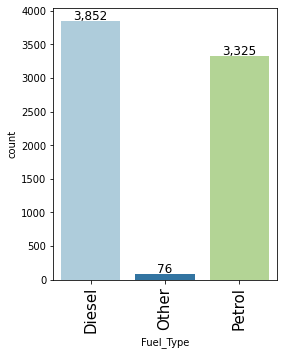

In [ ]:
labeled_barplot(data=df, feature='Fuel_Type')


**Insights**
- Grouped in 'Other' label CNG, LPG and Electric cars 
- Diesel is the most frequent fuel type followed by Petrol
- Changed type to category


##### Transmission

In [ ]:
df.Transmission.value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

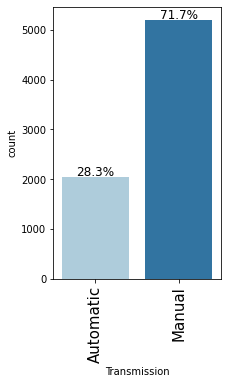

In [ ]:
#change type to category
df.Transmission = df.Transmission.astype(dtype='category')
labeled_barplot(data=df, feature='Transmission', perc=True)


**Insights** 
- Almost 30% of cars have automatic transmission
- Around 70% have manual transmission
- Changed type to category

##### Owner_Type

In [ ]:
df.Owner_Type.value_counts(normalize = True)

First            0.82
Second           0.16
Third            0.02
Fourth & Above   0.00
Name: Owner_Type, dtype: float64

In [ ]:
#Fourth and above are practically zero, we will group them together with 'Third' in a new label 'Third and above'
def owner_treatment(owner):
  if owner in ['Third','Fourth & Above']: 
    return 'Third & Above' #replace the original brand name for 'Third & Above' label
  return owner

df.Owner_Type = df.Owner_Type.apply(owner_treatment)
#change type to category
df.Owner_Type = df.Owner_Type.astype(dtype='category')
#lets see how the value_counts looks like
df.Owner_Type.value_counts(normalize = True)

First           0.82
Second          0.16
Third & Above   0.02
Name: Owner_Type, dtype: float64

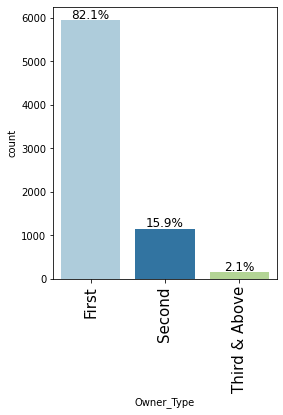

In [ ]:
labeled_barplot(data=df, feature='Owner_Type', perc=True)


**Insights**
- Grouped 'Third' and 'Fourth & Above' into a single label 'Third & Above'
- First is the most frequent value with more than 82%
- Second owner is the second most frequent with almost 16%
- Changed type to category

##### Mileage

In [ ]:
df.Mileage.sample(10)

385      17.8 kmpl
6676     20.5 kmpl
90       17.8 kmpl
4190    16.93 kmpl
2784    23.08 kmpl
458     21.76 kmpl
1591     15.0 kmpl
294      15.0 kmpl
6855    17.15 kmpl
600      19.3 kmpl
Name: Mileage, dtype: object

In [ ]:
#As we can see 'kmpl' label forms part of the values, lets get rid of them
def mileage_treatment(x):
  if isinstance(x, str):
    return x.split()[0]
  elif isinstance(x, float):
    return x
  else:
    return np.nan

df.Mileage = df.Mileage.apply(mileage_treatment)

In [ ]:
df.Mileage = df.Mileage.astype(dtype='float')

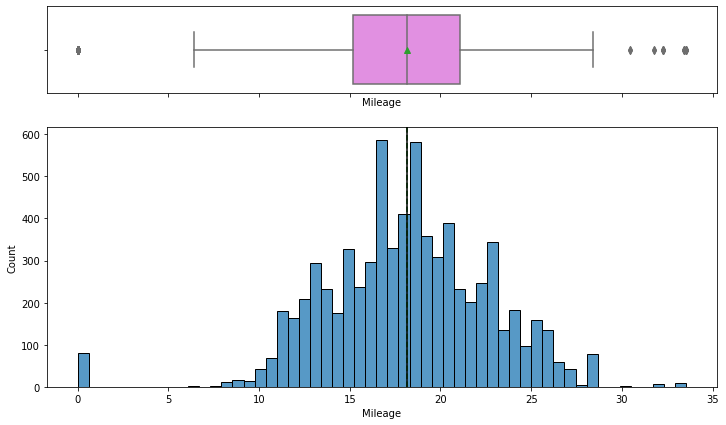

In [ ]:
histogram_boxplot(data=df, feature='Mileage')

In [ ]:
#lets treat the outliers
df = treat_outliers(df=df, col='Mileage')

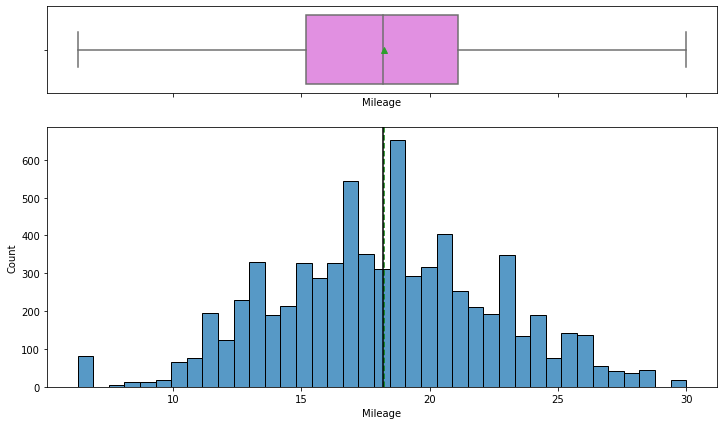

In [ ]:
histogram_boxplot(data=df, feature='Mileage')

In [ ]:
df.Mileage.describe()

count   7,251.00
mean       18.21
std         4.30
min         6.27
25%        15.17
50%        18.16
75%        21.10
max        30.00
Name: Mileage, dtype: float64

**Insights**
- Removed kmpl label
- Column type changed to float
- Removed outliers
- Mean is 18.21 km/l
- Range varies between 6.27 and 30 km/l

##### Engine

In [ ]:
df.Engine.head()

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: Engine, dtype: object

In [ ]:
## Lets remove CC from the records
def engine_treatment(x):
  if isinstance(x, str):
    return x.split()[0]
  elif isinstance(x, float):
    return x
  else:
    return np.nan

df.Engine = df.Engine.apply(engine_treatment)
#change dtype of column to float
df.Engine = df.Engine.astype(dtype='float')

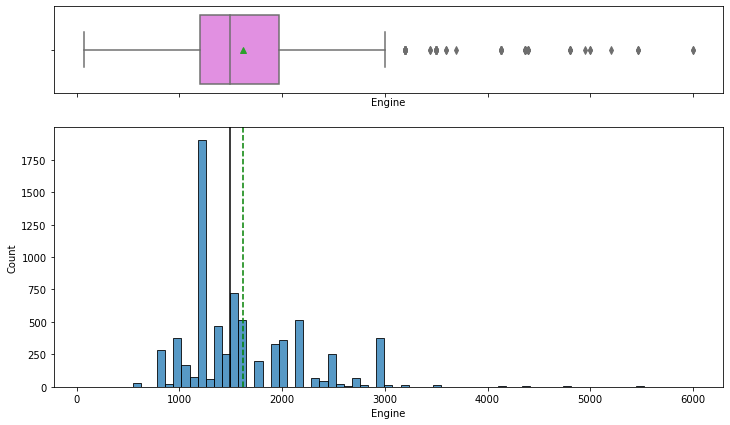

In [ ]:
histogram_boxplot(data=df, feature='Engine')

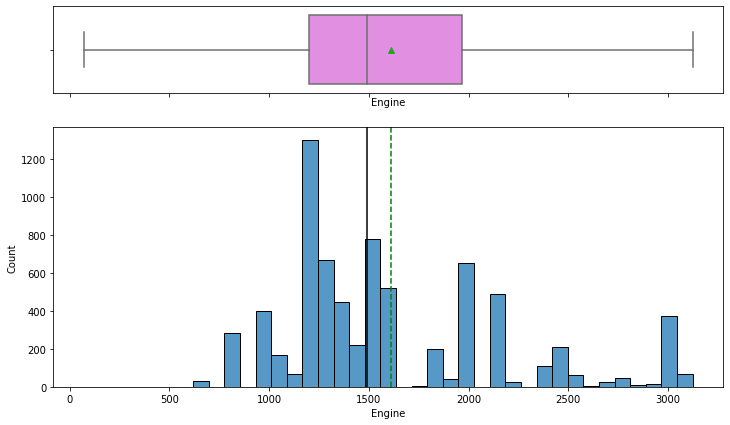

In [ ]:
#lets treat the outliers
df = treat_outliers(df=df, col='Engine')
histogram_boxplot(data=df, feature='Engine')

In [ ]:
df.Engine.describe()

count   7,207.00
mean    1,608.96
std       565.40
min        72.00
25%     1,198.00
50%     1,493.00
75%     1,968.00
max     3,123.00
Name: Engine, dtype: float64

**Insights**
- Removed CC label from values
- Changed type to float
- Treated Outliers
- mean is 1,608.96 CC
- range from 72 to 3,123 CC

##### Power

In [ ]:
df.Power.head()

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

In [ ]:
## Lets remove bhp from the records
def power_treatment(x):
  if isinstance(x, str):
    return x.split()[0]
  elif isinstance(x, float):
    return x
  else:
    return np.nan

df.Power = df.Power.apply(power_treatment)
#change dtype of column to float
df.Power = df.Power.astype(dtype='float')

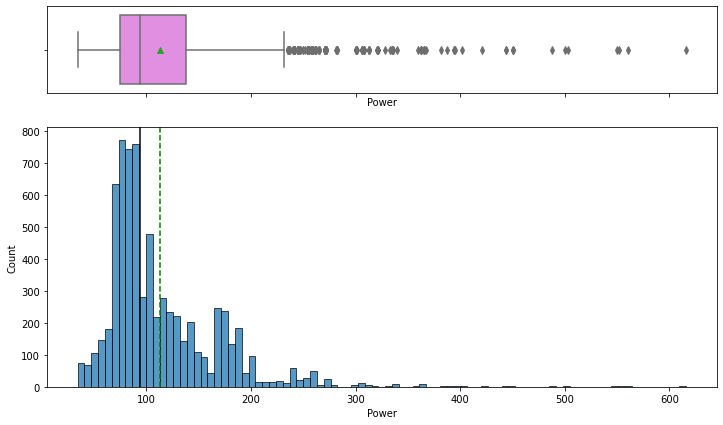

In [ ]:
histogram_boxplot(data=df, feature='Power')

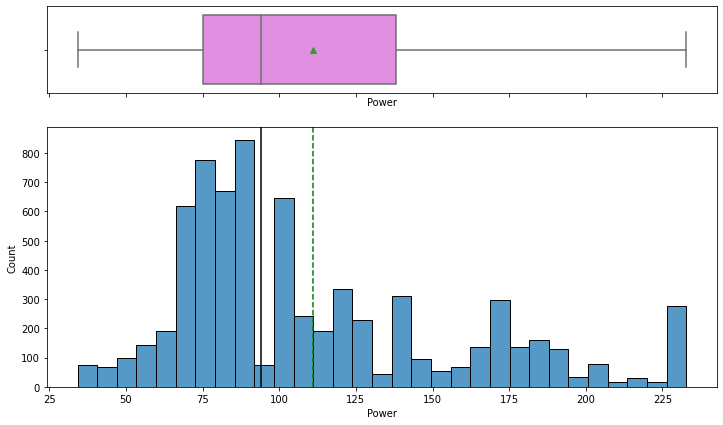

In [ ]:
#lets treat the outliers
df = treat_outliers(df=df, col='Power')
histogram_boxplot(data=df, feature='Power')

In [ ]:
df.Power.describe()

count   7,078.00
mean      110.93
std        46.76
min        34.20
25%        75.00
50%        94.00
75%       138.10
max       232.75
Name: Power, dtype: float64

**Insights**
- removed bhp from values
- type changed to float
- treated outliers
- mean around 111 bhp
- range from 34.2 to 232.75 bhp

##### Seats

In [ ]:
df.Seats.value_counts().sort_index()

0.00        1
2.00       18
4.00      119
5.00     6047
6.00       38
7.00      796
8.00      170
9.00        3
10.00       8
Name: Seats, dtype: int64

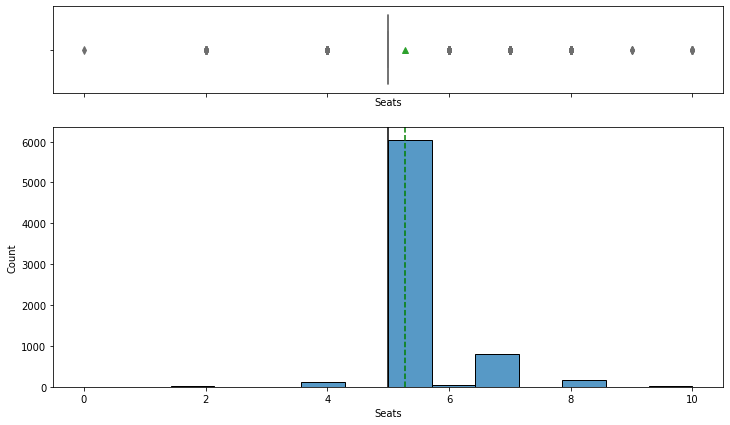

In [ ]:
histogram_boxplot(data=df, feature='Seats')

In [ ]:
#as we can see we have 1 car with 0 seats (that does not make sense) lets see that car
df[df.Seats == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
3999,Hyderabad,"2,012.00","125,000.00",Petrol,Automatic,First,10.50,"3,123.00",NaN,0.00,53.14,18.00,A-class,A4 3.2 FSI Tiptronic Quattro


In [ ]:
# We see that it is an Audi A4 it has 5 seats, so we will change it
df['Seats'] = df['Seats'].replace(0,5)

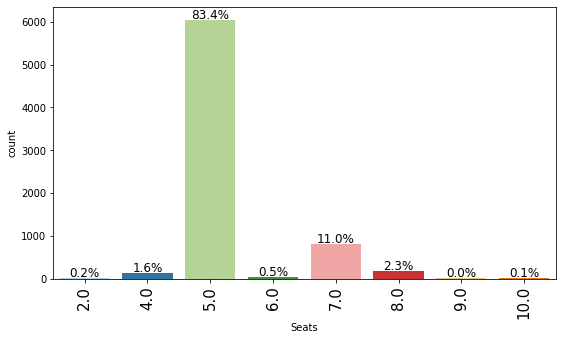

In [ ]:
labeled_barplot(data=df, feature='Seats', perc=True)

In [ ]:
df.Seats.value_counts().sort_index()

2.00       18
4.00      119
5.00     6048
6.00       38
7.00      796
8.00      170
9.00        3
10.00       8
Name: Seats, dtype: int64

In [ ]:
#change type to category
df.Seats = df.Seats.astype(dtype='category')

**Insights**
- Changed seat=0 to 5 since that car was an Audi A4
- Changed type to category, we will hot encode it later
- 5 seats is the most frequent value with more than 83%

##### New_Price

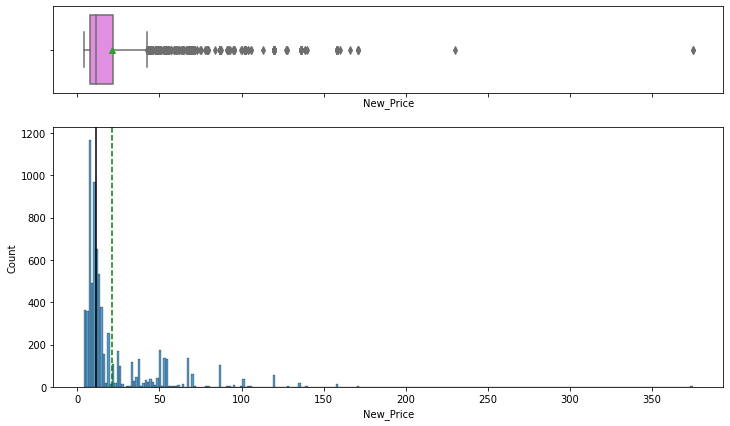

In [ ]:
histogram_boxplot(data=df, feature='New_Price')

In [ ]:
df.New_Price.max()

375.0

In [ ]:
#lets see the car(s) with maximum New_Price
df[df.New_Price == 375]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
5521,Hyderabad,"2,006.00","48,000.00",Petrol,Automatic,First,8.60,"3,123.00",232.75,4.00,375.00,59.00,Luxury,Continental Flying Spur
6354,Bangalore,"2,008.00","31,200.00",Petrol,Automatic,Second,10.20,"3,123.00",232.75,5.00,375.00,NaN,Luxury,Flying Spur W12


In [ ]:
#those are Bentleys and in some countries they can reach that value, so we willnot treat outliers
df.New_Price.describe()

count   7,253.00
mean       21.31
std        24.26
min         3.91
25%         7.88
50%        11.30
75%        21.69
max       375.00
Name: New_Price, dtype: float64

**Insights**
- Decided not to treat the outliers since the most expensive cars are bentleys and might get those prices
- The mean value is 21.31 INR Lakhs
- Range from 3.91 to 375 INR Lakhs

##### Price

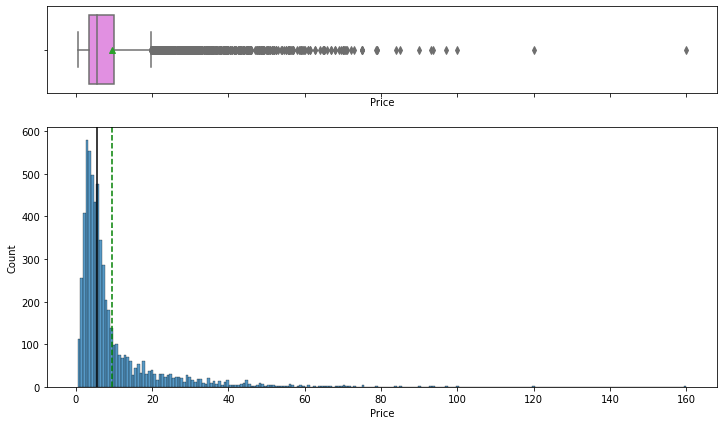

In [ ]:
histogram_boxplot(data=df, feature='Price')

**Insights**
- Price is our target feature for the regression model
- We will not treat its outliers

##### Model

In [ ]:
df.Model.describe()

count              7253
unique             2041
top       XUV500 W8 2WD
freq                 55
Name: Model, dtype: object

In [ ]:
#We can work with 33 brands, but not with more than 2 thousand models 
df = df.drop('Model', axis=1)

**Insights**
- We will not use Model feature in the model so we droped it

## Missing value treatment

In [ ]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
Brand                   0
dtype: int64

##### Price

In [ ]:
print('There are ', df.Price.isnull().sum(),' (',round(df.Price.isnull().sum() / df.shape[0] *100,2), '% ) of the total records')


There are  1234  ( 17.01 % ) of the total records


In [ ]:
#before treating them we will save a copy of them in a new DF
df_tmp = pd.DataFrame()
df_tmp['Price'] = df['Price']
df_tmp.shape

(7253, 1)

In [ ]:
#mean imputation
df['Price'].fillna(df['Price'].mean(), inplace=True)

In [ ]:
df.Price.isnull().sum()

0

**Insights**
- Missing values in Price where filled with the mean value

##### Mileage, Engine and Power

In [ ]:
#mean imputation
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)

**Insights** 
- Mileage, Engine and Power missing values were filled with its mean values

##### Seats

In [ ]:
df.Seats.value_counts(dropna=False)

5.0     6048
7.0      796
8.0      170
4.0      119
NaN       53
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [ ]:
df['Seats'].fillna(5, inplace=True)

In [ ]:
df.Seats.value_counts(dropna=False)

5.0     6101
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

**Insights**
- Filled missing values with 5, since  it is the mre frequent value

##### Check for missing values

In [ ]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

## Bivariate analysis

In [ ]:
### Target vs other features

In [ ]:
cat_cols = df.dtypes[df.dtypes == 'category'].index
num_cols = df.dtypes[df.dtypes == 'float'].index

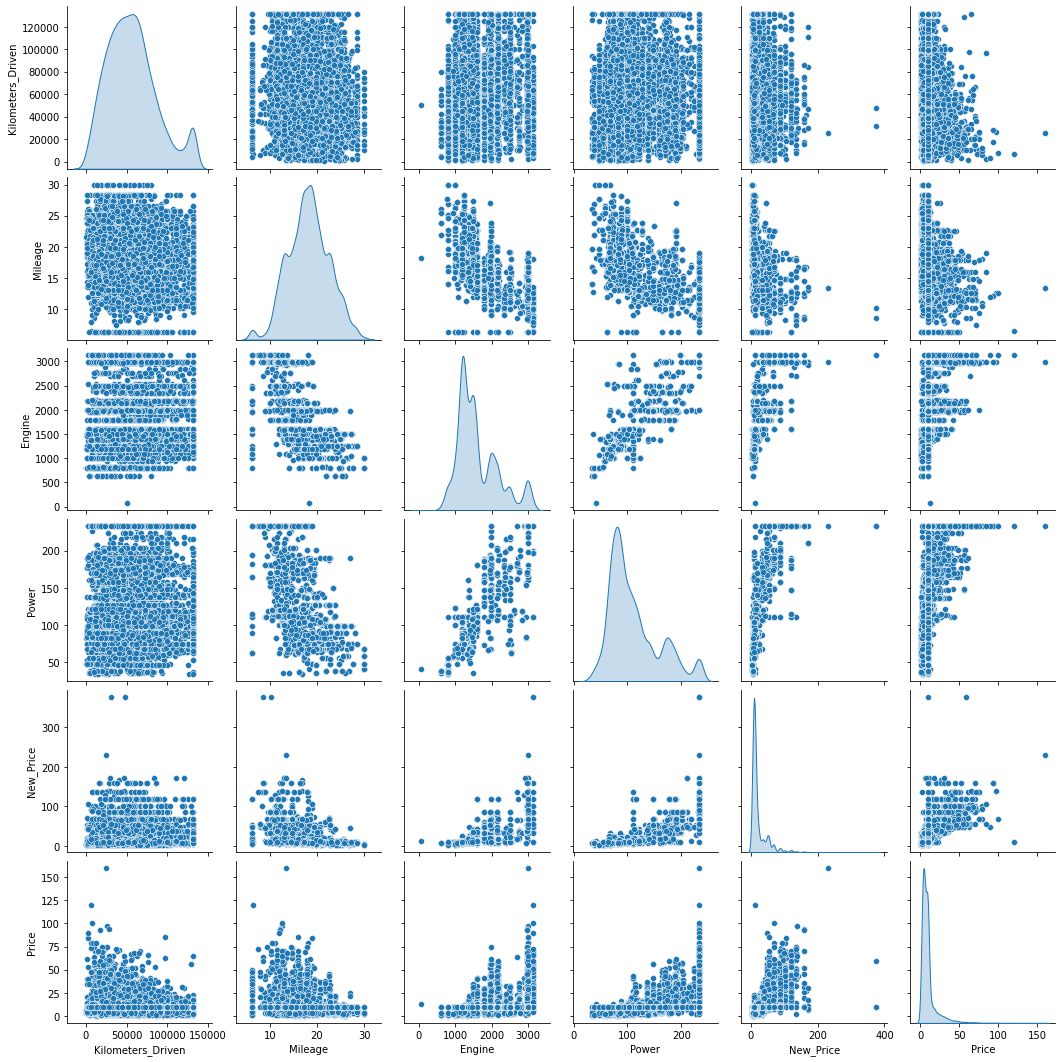

In [ ]:
sns.pairplot(data=df, diag_kind='kde')

**Insights**
- New_Price and Price distributions are highly skewed 
- Kilometers_Driven, Mileage, Engine and Power distributions are "close" to a normal distribution
- We will analyze correlation on the heatmap since we have its magnitude

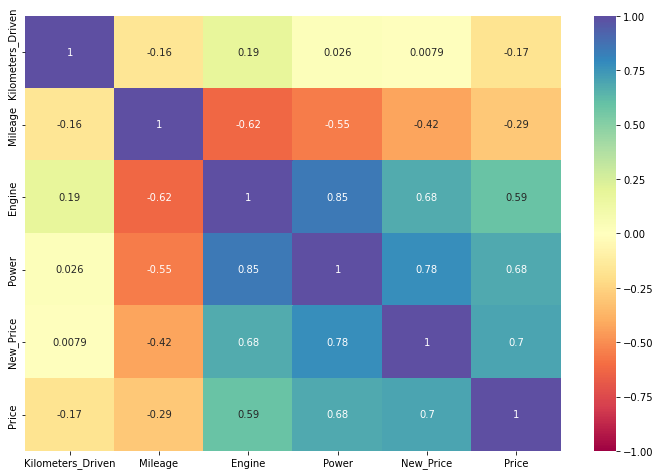

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

**Insights**
- Price has some significative correelations with New_Price, Power and Engine (but they are not very high)
- Power is greatly correlated with Engine
- Power has a significative correlation with New_Price
- Engine and Mileage have a negative correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   float64 
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   category
 10  New_Price          7253 non-null   float64 
 11  Price              7253 non-null   float64 
 12  Brand              7253 non-null   category
dtypes: category(7), float64(6)
memory usage: 391.7 KB


## Normalization and scaling the data

- We will normalize the numerical variables that have a distribution "close" to a normal one
- We will apply log to independent columns that are highly skewed

In [ ]:
cols_to_normalize = ['Kilometers_Driven', 'Mileage', 'Engine','Power']
cols_to_log = ['New_Price']

scaler = StandardScaler()
for col in cols_to_normalize:
  df[[col]] = scaler.fit_transform(df[[col]])


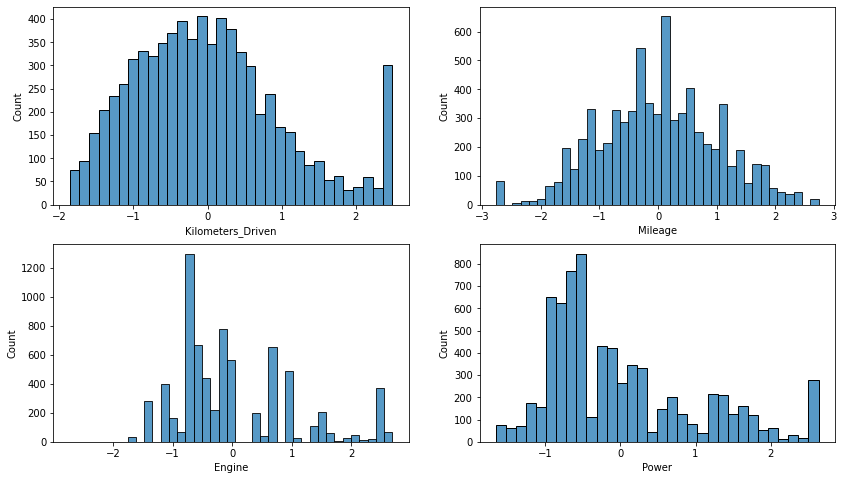

In [ ]:
f1 = plt.figure(figsize=(14,8))
position = 1 #initialize position variable 
for i, feature in enumerate(cols_to_normalize): #itarate for different hues
  plt.subplot(2, 2, position)
  position += 1
  sns.histplot(data=df, x=feature)


**Insights**
- The four features are now normalized

In [ ]:
df.New_Price.min()

3.91

In [ ]:
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname]) #we didnt add a value since df.New_Price.min() > 0
df.drop(cols_to_log, axis=1, inplace=True)

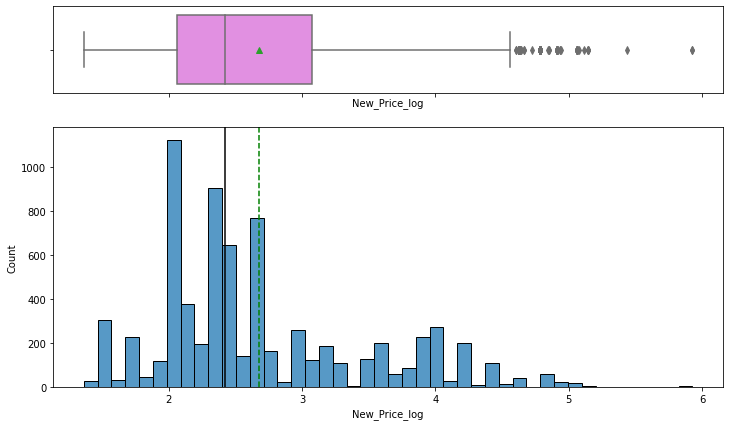

In [ ]:
histogram_boxplot(data=df, feature='New_Price_log')

In [ ]:
print('min: ', df.New_Price_log.min(), 'max: ', df.New_Price_log.max())

min:  1.3635373739972745 max:  5.926926025970411


**Insights**
- Values scaled 
- We wont treeat those outliers (reason in univariate analysis)

## Creating dummys

In [ ]:
#create a copy of df before creating dummies
df_orig = df.copy()
df = pd.get_dummies(df, columns=cat_cols)

# Model 1: Price treated missing values with mean

## Split the data

In [ ]:
df.Price.min()

0.44

In [ ]:
df1 = df.copy()
df1['Price_log'] = np.log(df1['Price'])
df1 = df1.drop('Price', axis=1)

In [ ]:
X = df1.drop('Price_log', axis=1)
y = df1['Price_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


## Linear regression model

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Lets see the hyperparameters of the model
model1.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
print("Training Performance\n")
lin_reg_model1_train_perf = model_performance_regression(model1, X_train, y_train, 'model 1')
lin_reg_model1_train_perf

Training Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 1,0.41,0.29,0.74,0.74,29.20


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model1_test_perf = model_performance_regression(model1, X_test, y_test, 'model 1')
lin_reg_model1_test_perf

Test Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 1,0.42,0.29,0.74,0.74,26.21


# Model 2: Price treatment: drop Nan Values

We will create a second model, where instead of imputing mean on Price we will drop those missing values

## Prepare data for second model

In [ ]:
#we create the copy
df2 = df.copy()
#We drop the imputed  Price column
df2.drop('Price', axis=1)
#we put the original Price column
df2['Price'] = df_tmp['Price']
#we treat the missing values (drop them)
df2.dropna(inplace=True)


In [ ]:
# log of Price
df2['Price_log'] = np.log(df2['Price'])
df2 = df2.drop('Price', axis=1)

## Split the data

In [ ]:
#We split the data from df2 who has droped nan values from Price
X = df2.drop('Price_log', axis=1)
y = df2['Price_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


## Linear regression model

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Lets see the hyperparameters of the model
model2.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(model2, X_train, y_train, 'model 2')
lin_reg_model2_train_perf

Training Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 2,0.24,0.18,0.92,0.92,18.57


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(model2, X_test, y_test, 'model 2')
lin_reg_model2_test_perf

Test Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 2,0.22,0.17,0.94,0.93,17.69


# Model 3: Price treatment: conditional mean()

We will create a third model, where instead of imputing mean on Price we will impute a conditional mean

## Prepare data for third model

We will treat Price nulls as follow:
- Level 1: we will get the mean grouped by
  - Year, Location, Fuel_Type, Seats, Brand, Owner_Type and Transmission
  - Input the mean of every group to the corresponding NaN values
- Level 2: we will get the mean grouped by
  - Year, Location, Fuel_Type, Seats, Brand and Owner_Type
  - Input the mean of every group to the corresponding NaN values
- Level 3: we will get the mean grouped by
  - Year, Location, Seats, Brand and Owner_Type 
  - Input the mean of every group to the corresponding NaN values
- Level 4: we will get the mean grouped by
  - Year, Location, Brand and Owner_Type  
  - Input the mean of every group to the corresponding NaN values
- Level 5: we will get the mean grouped by
  - Year, Brand and Owner_Type  
  - Input the mean of every group to the corresponding NaN values
- Level 6: we will get the mean grouped by
  - Year and Brand  
  - Input the mean of every group to the corresponding NaN values
- Level 7: we will get the mean grouped by
  - Year
  - Input the mean of every group to the corresponding NaN values


In [ ]:
#we create the copy
df3 = df_orig.copy()
#We drop the imputed  Price column
df3.drop('Price', axis=1)
#we put the original Price column
df3['Price'] = df_tmp['Price']
#we treat the missing values 



In [ ]:
def treat_price_cond(row, lvl):
  if np.isnan(row['Price']):
    if lvl == 1:
      filtro = (
          (df3a['Year'] == row['Year']) & 
          (df3a['Location'] == row['Location']) & 
          (df3a['Fuel_Type'] == row['Fuel_Type']) & 
          (df3a['Seats'] == row['Seats']) & 
          (df3a['Brand'] == row['Brand']) & 
          (df3a['Owner_Type'] == row['Owner_Type']) & 
          (df3a['Transmission'] == row['Transmission']) 
      )
    elif lvl == 2:
      filtro = (
          (df3a['Year'] == row['Year']) & 
          (df3a['Location'] == row['Location']) & 
          (df3a['Fuel_Type'] == row['Fuel_Type']) & 
          (df3a['Seats'] == row['Seats']) & 
          (df3a['Brand'] == row['Brand']) & 
          (df3a['Owner_Type'] == row['Owner_Type'])
      )
    elif lvl == 3:
      filtro = (
          (df3a['Year'] == row['Year']) & 
          (df3a['Location'] == row['Location']) &  
          (df3a['Seats'] == row['Seats']) & 
          (df3a['Brand'] == row['Brand']) & 
          (df3a['Owner_Type'] == row['Owner_Type'])
      )
    elif lvl == 4:
      filtro = (
          (df3a['Year'] == row['Year']) & 
          (df3a['Location'] == row['Location']) &  
          (df3a['Brand'] == row['Brand']) & 
          (df3a['Owner_Type'] == row['Owner_Type'])
      )
    elif lvl == 5:
      filtro = (
          (df3a['Year'] == row['Year']) &  
          (df3a['Brand'] == row['Brand']) & 
          (df3a['Owner_Type'] == row['Owner_Type'])
      )
    elif lvl == 6:
      filtro = (
          (df3a['Year'] == row['Year']) &  
          (df3a['Brand'] == row['Brand']) 
      )
    elif lvl == 7:
      filtro = (
          (df3a['Year'] == row['Year']) 
      )
    new_Price = df3a[filtro].Price_mean.values[0]
    return new_Price
  else:
    return row['Price']




In [ ]:
df3.Price.isnull().sum()

1234

In [ ]:
g_by = [
    ['Year','Location','Fuel_Type','Seats','Brand','Owner_Type','Transmission'],
    ['Year','Location','Fuel_Type','Seats','Brand','Owner_Type'],
    ['Year','Location','Seats','Brand','Owner_Type'],
    ['Year','Location','Brand','Owner_Type'],
    ['Year','Brand','Owner_Type'],
    ['Year','Brand'],
    ['Year']
]
for i in range(0,7):
  df3a = df3.groupby(g_by[i]).Price.mean().reset_index(name='Price_mean')
  df3['Price'] = df3.apply(lambda r: treat_price_cond(r, i+1), axis=1)
  print('After level', i+1, 'there are ', df3.Price.isnull().sum(), 'NaN values')

After level 1 there are  190 NaN values
After level 2 there are  147 NaN values
After level 3 there are  94 NaN values
After level 4 there are  35 NaN values
After level 5 there are  4 NaN values
After level 6 there are  0 NaN values
After level 7 there are  0 NaN values


In [ ]:
df3['Price_log'] = np.log(df3['Price'])
df3 = df3.drop('Price', axis=1)

In [ ]:
#creating dummies
df3 = pd.get_dummies(df3, columns=cat_cols)

## Split the data

In [ ]:
#We split the data from df3 
X = df3.drop('Price_log', axis=1)
y = df3['Price_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


## Linear regression model

In [ ]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Lets see the hyperparameters of the model
model3.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
print("Training Performance\n")
lin_reg_model3_train_perf = model_performance_regression(model3, X_train, y_train, 'model 3')
lin_reg_model3_train_perf

Training Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 3,0.25,0.19,0.91,0.91,19.26


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model3_test_perf = model_performance_regression(model3, X_test, y_test, 'model 3')
lin_reg_model3_test_perf

Test Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 3,0.28,0.19,0.90,0.90,18.88


# Model 4: Categorical dimensions reduction


We will create a fourth model, we will reduce the dimensions of some categorical variables and Price Nan values will be treated as they were treated in model 3

## Prepare data for fourth model

In [ ]:
#we create the copy
df4 = df_orig.copy()
#We drop the imputed  Price column
df4 = df4.drop('Price', axis=1)
#we put the Price column of df3 (treated as in model 3)
df4['Price_log'] = df3['Price_log']
df4 = df4.reset_index(drop=True)



In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   float64 
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   float64 
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   category
 10  Brand              7253 non-null   category
 11  New_Price_log      7253 non-null   float64 
 12  Price_log          7253 non-null   float64 
dtypes: category(7), float64(6)
memory usage: 391.7 KB


We will reduce the number of dimensions of Year and Location 

#### Year

We will group Year in 4 categories

In [ ]:
Year_map = {
    2004: 'Old',
    2005: 'Old',
    2006: 'Old',
    2007: 'Old',
    2008: 'Old',
    2009: 'Old',
    2010: 'Old',
    2011: 'Recent',
    2012: 'Recent',
    2013: 'Recent',
    2014: 'Recent',
    2015: 'Almost New',
    2016: 'Almost New',
    2017: 'Almost New',
    2018: 'Almost New',
    2019: 'New',
}

df4['Year'] = df4['Year'].map(Year_map)

#### Location

We will create 4 groups: North, East, West and South
and put every city in one of those groups

- North
  - Delhi
  - Jaipur
- East
  - Kolkata
- West
  - Mumbai
  - Pune
  - Ahmedabad
- South
  - Hyderabad
  - Coimbatore
  - Kochi
  - Chennai
  - Bangalore



In [ ]:
Location_map = {
    'Delhi': 'North',
    'Jaipur': 'North',
    'Kolkata': 'East',
    'Mumbai': 'West',
    'Pune': 'West',
    'Ahmedabad': 'West',
    'Hyderabad': 'South',
    'Coimbatore': 'South',
    'Kochi': 'South',
    'Chennai': 'South',
    'Bangalore': 'South',
}

df4['Location'] = df4['Location'].map(Location_map)


In [ ]:
df4.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
New_Price_log        0
Price_log            0
dtype: int64

In [ ]:
df4.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,New_Price_log,Price_log
1282,West,Recent,-0.47,Petrol,Automatic,Third & Above,-0.88,-0.02,-0.16,5.00,B-class,2.58,1.22
2678,South,Recent,-1.35,Petrol,Manual,First,1.00,-1.08,-0.95,5.00,B-class,1.62,1.21
717,South,Recent,-0.34,Diesel,Automatic,Second,-0.25,0.64,1.37,5.00,A-class,3.97,2.97
6457,South,Almost New,-0.49,Diesel,Automatic,First,-1.09,1.54,1.40,7.00,B-class,3.53,3.05
533,West,Old,0.42,Petrol,Automatic,Second,-0.33,-0.20,0.15,5.00,B-class,2.61,1.05


### Creating dummies

In [ ]:
df4 = pd.get_dummies(df4, columns=cat_cols)

## Split the data

In [ ]:
#We split the data from df2 who has droped nan values from Price
X = df4.drop('Price_log', axis=1)
y = df4['Price_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


## Linear regression model

In [ ]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Lets see the hyperparameters of the model
model4.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
print("Training Performance\n")
lin_reg_model4_train_perf = model_performance_regression(model4, X_train, y_train, 'model 4')
lin_reg_model4_train_perf

Training Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 4,0.29,0.22,0.88,0.88,24.65


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model4_test_perf = model_performance_regression(model4, X_test, y_test, 'model 4')
lin_reg_model4_test_perf

Test Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 4,0.31,0.23,0.88,0.87,23.43


# Model 5: Price treatment: linear regression

We will create a fifth model, where instead of imputing mean on Price we will create a linear regression model (modedel5a) to calculate them and then a second model (model5b) to predict unseen data

## Prepare data for fifth model

In [ ]:
#we create the copy
df5 = df_orig.copy()
#We drop the imputed  Price column
df5 = df5.drop('Price', axis=1)
#we put the original Price column
df5['Price'] = df_tmp['Price']
#we treat the missing values 



## Model to fill nan Price values

In [ ]:
## We will create a dataframe droping the Nan values on Price
df5_p = df5[pd.notnull(df5['Price'])]
df5.shape, df5_p.shape

((7253, 13), (6019, 13))

In [ ]:
df5_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   category
 2   Kilometers_Driven  6019 non-null   float64 
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   category
 10  Brand              6019 non-null   category
 11  New_Price_log      6019 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(7), float64(6)
memory usage: 372.3 KB


In [ ]:
df5_p = df5_p.reset_index(drop=True)

In [ ]:
# log of Price
df5_p['Price_log'] = np.log(df5_p['Price'])
df5_p = df5_p.drop('Price', axis=1)

In [ ]:
#creating dummies
df5_p = pd.get_dummies(df5_p, columns=cat_cols)

### Split the data

In [ ]:
#We split the data from df3 
X = df5_p.drop('Price_log', axis=1)
y = df5_p['Price_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


### Linear regression model

In [ ]:
model5a = LinearRegression()
model5a.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Lets see the hyperparameters of the model
model5a.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
print("Training Performance\n")
lin_reg_model5a_train_perf = model_performance_regression(model5a, X_train, y_train, 'model 5a')
lin_reg_model5a_train_perf

Training Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 5a,0.24,0.18,0.92,0.92,18.57


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model5a_test_perf = model_performance_regression(model5a, X_test, y_test, 'model 5a')
lin_reg_model5a_test_perf

Test Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 5a,0.22,0.17,0.94,0.93,17.69


### now we will predict the values of the missing Prices

In [ ]:
df5_to_predict = df5[pd.isnull(df5['Price'])]
df5.shape, df5_to_predict.shape

((7253, 13), (1234, 13))

In [ ]:
#creating dummies
df5_to_predict = pd.get_dummies(df5_to_predict, columns=cat_cols)

In [ ]:
X_to_predict = df5_to_predict.drop('Price', axis=1)
y_to_predict = df5_to_predict['Price']

In [ ]:
y_predicted = model5a.predict(X_to_predict)
y_predicted = pd.Series(y_predicted)

In [ ]:
X.shape, X_to_predict.shape, y.shape, y_predicted.shape

((6019, 52), (1234, 52), (6019,), (1234,))

In [ ]:
# Now we have to create an X and a y with all the data
X = pd.concat([X, X_to_predict], axis=0)
y = pd.concat([y, y_predicted], axis=0)

In [ ]:
X.shape, y.shape

((7253, 52), (7253,))

## Model to predict unseen data

We have X and y with non Nan Price values

### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


### Linear regression model

In [ ]:
model5b = LinearRegression()
model5b.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Lets see the hyperparameters of the model
model5b.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
print("Training Performance\n")
lin_reg_model5b_train_perf = model_performance_regression(model5b, X_train, y_train, 'model 5')
lin_reg_model5b_train_perf

Training Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 5,0.21,0.14,0.94,0.94,15.64


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model5b_test_perf = model_performance_regression(model5b, X_test, y_test, 'model 5')
lin_reg_model5b_test_perf

Test Performance



,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 5,0.23,0.15,0.93,0.93,14.46


# Model comparisons

In [ ]:
df_comparison = pd.concat([lin_reg_model1_test_perf, 
                           lin_reg_model2_test_perf, 
                           lin_reg_model3_test_perf, 
                           lin_reg_model4_test_perf, 
                           lin_reg_model5b_test_perf],
                           axis = 0
                          )
df_comparison.sort_values(by='R-squared', ascending=False)

,Model,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,model 2,0.22,0.17,0.94,0.93,17.69
0,model 5,0.23,0.15,0.93,0.93,14.46
0,model 3,0.28,0.19,0.90,0.90,18.88
0,model 4,0.31,0.23,0.88,0.87,23.43
0,model 1,0.42,0.29,0.74,0.74,26.21


## Interpreting the Regression Results:

- **Adjusted. R-squared** It reflects the fit of the model
  - Model 2 has the better fit with an adj R squared of 0.94 which is good
  - Model 5 has the second best adjusted R squared of 0.93
  - Model 3 has the third one  adjusted R squared of 0.90
  - Model 4 has adj-R2 of 0.87
  - Model 1 has the worst adjusted R squared of 0.74

- **RMSE** root mean squared error. It reflects how accurate is the model, the lower it is the better is the performance 
  - Model 2 has the better RMSE with a value of 0.22
  - Model 5 has the second best value of 0.23
  - Model 1 has the worst one with a value of 0.42

- **MAPE** the lower it is the better the model accuracy
  - Model 5 has the best MAPE of 14.46
  - Model 2 has the second best of 17.69

- **The BEST model** is model 5 since its adjusted R2 and RMSE are practically the same as the best model and its MAPE is signigficantly better than the others


# Conclusion

## Insights

**General**
- We have more than 2,000 unique names (cars) in the dataset
- We have 11 unique locations
- We have cars from year 1996 to 2019, 50% of them are from 1996 to 2014
- The means of kilometers driven is almost 59,000 and there is clearly an outlier in the right side (most probably an error in the data with a value of 6.5 million)
- We have 5 different values for the Fuel_Type feature
- Owner_Type has 4 unique possible values
- We dont see statsistics of Mileage, Engine and Power due that they have labels in heir values, we will treat them later and see their statistics
- We have cars from 0? to 10 seats with an average of 5.28
- New_price varies from 3.91 to 375 INR Lakhs
- Price varies from 0.44 to 160 INR Lakhs

**Brand**

We have a lot of brands in the dataset, lets group them in 4 groups:
- Luxury
  - Porsche, Bentley. Lamborghini
- A class
  - Mercedes-Benz, BMW, Audi, Land, Jaguar, Mini, Volvo
- B class
  - Maruti, Honda, Toyota, Volkswagen, Ford, Mahindra, Skoda, Renault, Nissan, Mitsubishi, Jeep
- Convenience
  - Hyundai, Tata, Chevrolet, Fiat, Datsun, ISUZU, Force, Isuzu, Smart, Ambassador, Hindustan, OpelCorsa

**Location**
- There are 11 unique locations in the dataset
- Ahmedabad has the least cars
- Mumbai has the most cars

**Year**
- Treated the outliers in the lower side and put them at 2004
- 2015 and 2014 are the most frequent years

**Kilometers Driven**
- Mean around 56,000 kms
- Range from 171 to 131,500 kms

**Fuel Type**
- Grouped in 'Other' label CNG, LPG and Electric cars 
- Diesel is the most frequent fuel type followed by Petrol

**Transmission**
- Almost 30% of cars have automatic transmission
- Around 70% have manual transmission

**Owner Type**
- Grouped 'Third' and 'Fourth & Above' into a single label 'Third & Above'
- First is the most frequent value with more than 82%
- Second owner is the second most frequent with almost 16%

**Mileage**
- Removed kmpl label
- Removed outliers
- Mean is 18.21 km/l
- Range varies between 6.27 and 30 km/l

**Engine**
- Removed CC label from values
- Treated Outliers
- Mean is 1,608.96 CC
- Range from 72 to 3,123 CC

**Power**
- Removed bhp from values
- Treated outliers
- Mean around 111 bhp
- Range from 34.2 to 232.75 bhp

**Seats**
- Changed seat=0 to 5 since that car was an Audi A4
- Changed type to category, we will hot encode it later
- 5 seats is the most frequent value with more than 83%

**New Price**
- Decided not to treat the outliers since the most expensive cars are bentleys and might get those prices
- The mean value is 21.31 INR Lakhs
- Range from 3.91 to 375 INR Lakhs

**Missing value treatment**
- Mileage missing values filled with mean
- Engine missing values filled with mean
- Power missing values filled with mean
- Seats missing values with mode (5) 
- Price missing values willbe treated in each model


**Distributions**
- New_Price distribution is highly skewed
- Price distribution is highly skewed
- Kilometers_Driven distribution is "close" to normal
- Mileage distribution is "close" to normal
- Engine distribution is "close" to normal
- Power distribution is "close" to normal


**Correlations**
- Price has some significative correelations with 
  - New_Price
  - Power
  - Engine
- Power is greatly correlated with Engine
- Power has a significative correlation with New_Price
- Engine and Mileage have a negative correlation

**Normalization**
- Kilometers_Driven
- Mileage
- Engine
- Power

**Log**
New Price

**MODEL 1**
- Price missing values treated with mean
- Applied log to Price

**MODEL 2**
- Price missing values dropped
- Applied log to price

**MODEL 3**
- Price missing values treated as follows:
  - Level 1: we will get the mean grouped by
    - Year, Location, Fuel_Type, Seats, Brand, Owner_Type and Transmission
    - Input the mean of every group to the corresponding NaN values
  - Level 2: we will get the mean grouped by
    - Year, Location, Fuel_Type, Seats, Brand and Owner_Type
    - Input the mean of every group to the corresponding NaN values
  - Level 3: we will get the mean grouped by
    - Year, Location, Seats, Brand and Owner_Type 
    - Input the mean of every group to the corresponding NaN values
  - Level 4: we will get the mean grouped by
    - Year, Location, Brand and Owner_Type  
    - Input the mean of every group to the corresponding NaN values
  - Level 5: we will get the mean grouped by
    - Year, Brand and Owner_Type  
    - Input the mean of every group to the corresponding NaN values
  - Level 6: we will get the mean grouped by
    - Year and Brand  
    - Input the mean of every group to the corresponding NaN values
  - Level 7: we will get the mean grouped by
    - Year
    - Input the mean of every group to the corresponding NaN values
- Applied log to Price

**MODEL 4**
- Price missing values treated as in model 3
- Year grouped in:
  - Old
  - Recent
  - Almost New
  - New
- Location grouped in:
  - North
  - South
  - East
  - West
- Applied log to Price

**MODEL 5**
- Price missing values calculated with a linear regression model
- Applied log to Price


## Recommendations


1. Capture the brand and the model in different columns
2. Be sure to have the sell price of the unit, since almost 20% were missing and it is a key process indicator of the business
3. Do not place labels in the data
  - Mileage : kmpl , km/kg
  - Engine : CC
  - Power : bhp
4. Try to capture all relevnt data of every sale, try to avoid having missing values
5. Use model 5 to predict new sales since:
  - It has a very good fit with the data (A-R2: 0.93)
  - It has an accuracy of 85.54% (100 - MAPE)

# Convert ipynb to HTML

In [ ]:
%%shell
jupyter nbconvert --to html ///content/P2_SLRegression_EMS.ipynb

[NbConvertApp] Converting notebook ///content/P2_SLRegression_EMS.ipynb to html
[NbConvertApp] Writing 1691663 bytes to ///content/P2_SLRegression_EMS.html
